In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import os
import random


from empirical_data import *
from optimized_random_response import *
from randomized_response import *
from repetitive_optimizer import *
from synthetic_dataset import *
from exponential_mechanism import *
from simpleinfotheory import *
from normalize_error_matrix import *
from alphabet import *
import matplotlib as mpl
import matplotlib.lines as mlines

mpl.rcParams.update({'font.size': 12})

In [2]:
def mutual_info_pair(a, b):
    return mutualinformationempirical(xn=a, yn=b)[0]

In [3]:
# I(A;A',B') = I(A;A') + I(A;B'|A')

def conditional_mutual_info(a, b, c):
    return conditionalmutualinformationempirical(a, b, c)

def total_info_leakage(A, A_prime, B_prime):
    return mutual_info_pair(A, A_prime) + conditional_mutual_info(A, B_prime, A_prime)

In [4]:
def mutual_information(a, b):
    processed_a = []
    # print(a)
    # print(b)
    for i in a:
        actual_split = i.split(" ")
        actual = []
        # print(actual_split)
        for j in actual_split:
            # print(i)
            if j != "" :
                actual.append(int(j))
        processed_a.append(np.array(actual))
    processed_a = np.array(processed_a)
    processed_b = []
    
    for i in b:
        actual_split = i.split(" ")
        actual = []
        # print(actual_split)
        for j in actual_split:
            # print(i)
            if j != "" :
                actual.append(int(j))
        processed_b.append(np.array(actual))
    processed_b = np.array(processed_b)

    mi = []
    # print("processed_a", processed_a)
    # print("processed_b", processed_b)
    # for i in range(np.shape(processed_b)[1]):
    #     mi.append(mutual_info_pair(processed_a[:,i], processed_b[:,i]))
    # mi.append(mutual_info_pair(processed_a[:,0], processed_a[:,1]))
    # mi.append(mutual_info_pair(processed_b[:,1], processed_b[:,0]))
    # mi.append(mutual_info_pair(processed_a[:,0], processed_b[:,0]))
    # mi.append(mutual_info_pair(processed_a[:,1], processed_b[:,1]))
    mi.append(total_info_leakage(processed_a[:,0], processed_b[:,0], processed_b[:,1]))
    mi.append(total_info_leakage(processed_a[:,1], processed_b[:,1], processed_b[:,0]))
    # mi.append(total_info_leakage(processed_a[:,0], processed_b[:,1], processed_b[:,0]))
    return mi
    

1.0
l2_error  0.4871669259553009
1.1
l2_error  0.542579253715654
1.2000000000000002
l2_error  0.599090000950764
1.3
l2_error  0.6566299781786745
1.4000000000000001
l2_error  0.7151831489969822
1.5
l2_error  0.774725413781324
1.0
l2_error  0.4871669259553009
1.1
l2_error  0.542579253715654
1.2000000000000002
l2_error  0.599090000950764
1.3
l2_error  0.6566299781786745
1.4000000000000001
l2_error  0.7151831489969822
1.5
l2_error  0.774725413781324
1.6
l2_error  0.8352108592710938
1.0
l2_error  0.42102799193681417
1.1


/Users/sandarujayawardana/Documents/Python_code/.venv/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


l2_error  0.43370442581262814
1.2000000000000002
l2_error  0.4931788816697676
1.3
l2_error  0.5285802703498079
1.4000000000000001
l2_error  0.5780932931545053
1.5
l2_error  0.6294207936578062
1.6
l2_error  0.6936868493741659
1.7000000000000002
l2_error  0.7315829393692969
1.8
l2_error  0.8346535647728747
1.9000000000000001
l2_error  0.7108021486064319
2.0
l2_error  0.7545282491752971
2.1
l2_error  0.8011646474372879
2.2
l2_error  0.8484879994783849
2.3000000000000003
l2_error  0.8907415802169558
2.4000000000000004
l2_error  0.9381560165521813
1.0
l2_error  0.4490098904314457
1.1
l2_error  0.49967908704777647
1.2000000000000002
l2_error  0.5509768042580403
1.3
l2_error  0.6043372634136438
1.4000000000000001
l2_error  0.6587040959585568
1.5
l2_error  0.7208162961903789
1.6
l2_error  0.7715485299380714
1.7000000000000002
l2_error  0.11453669426564807
1.8
l2_error  0.1422535992448098
1.9000000000000001
l2_error  0.0544050972793446
2.0
l2_error  0.01598715691505046
2.1
l2_error  0.024533155

<Figure size 640x480 with 0 Axes>

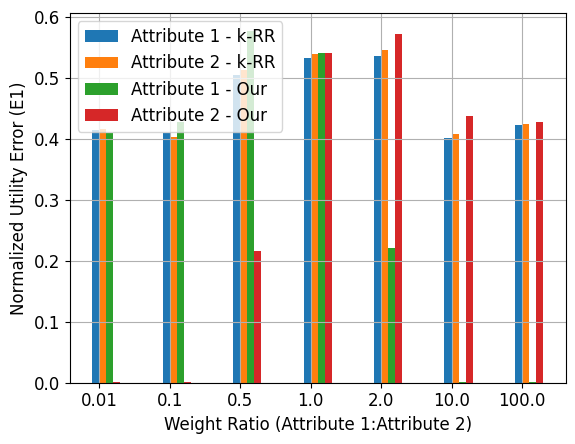

In [9]:
'''
    Test information leakage of attributes against their weight ratio.
'''

TARGET_UTILITY_ERROR = 0.2
NUM_ATTRIBUTES = 2
NUM_STATES = [3, 3]
DATASET_SIZE = 15000
EPS_ARRAY = np.arange(10, 70)*0.10
plt.tight_layout()

# priority_list = [{'1': 0.01*2/1.01, '0': 1*2/1.01}, {'1': 0.1*2/1.1, '0': 1*2/1.1}, {'1': 0.5*2/1.5, '0': 1*2/1.5}, {'1': 1, '0': 1}, {'1': 1*2/1.5, '0': 0.5*2/1.5}, {'1': 1*2/1.1, '0': 0.1*2/1.1}, {'1': 1*2/1.01, '0': 0.01*2/1.01}]
priority_list = [{'1': 0.01, '0': 1}, {'1': 0.1, '0': 1}, {'1': 0.5, '0': 1}, {'1': 1, '0': 1}, {'1': 1, '0': 0.5}, {'1': 1, '0': 0.1}, {'1': 1, '0': 0.01}]
# priority_list = [{'1': 100, '0': 1}, {'1': 50, '0': 1}, {'1': 20, '0': 1}, {'1': 1, '0': 1}] 
distribution_list = np.ones(9)/9 # [0.3, 0.01, 0.01, 0.01, 0.30, 0.01, 0.01, 0.01, 0.34] # np.ones(9)/9 # 

colour_err_ = {"k-RR": "red", "Optimal k-RR": "blue"}
colour_mi_ = {"k-RR": ["lightsalmon", "brown"], "Optimal k-RR": ["green", "purple"]}

values_k_rr = []
values_optimal = []

x_sticks_list = []

for priority_dict in priority_list:
    x_sticks_list.append(str(round(priority_dict['1']/priority_dict['0'],3)))
    random_dist = distribution_list
    TOTAL_STATES = 1
    alphabet_dict = {}
    for i in range(NUM_ATTRIBUTES):
        TOTAL_STATES *= NUM_STATES[i]
        alphabet_dict[str(i)] = np.arange(NUM_STATES[i])

    ALL_ALPHABET = create_alphabet(attributes_with_alphabet=alphabet_dict)
    STRING_ALL_ALPHABET = convert_alphabet_to_string(ALL_ALPHABET)
    ATTRIBUTE_LIST = list(alphabet_dict.keys())

    synthetic_dataset_constructor = Gen_Synthetic_Dataset(no_of_states = TOTAL_STATES, no_of_samples = DATASET_SIZE, alphabet=STRING_ALL_ALPHABET)
    correlated_synthetic_dataset = synthetic_dataset_constructor.gen_custom(distribution=random_dist)

    alphabet_dict = {}
    for i in range(len(ALL_ALPHABET)):
        alphabet_dict[str(ALL_ALPHABET[i])] = i
    normalize_error_matrix = Normalize_error_matrix(attribute_list=ATTRIBUTE_LIST, alphabet=ALL_ALPHABET, priority_dict=priority_dict, alphabet_dict=alphabet_dict, err_type="l2")
    err_matrix = normalize_error_matrix.normalized_error_matrix
    # sns.heatmap(err_matrix)
    # plt.show()
    random_response_mechanism = Randomized_Response(STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix)

    optimal_random_response_mechanism = Optimized_Randomized_Response(prior_dist = random_dist, STATE_COUNT = TOTAL_STATES, INPUT_ALPHABET = STRING_ALL_ALPHABET, normalized_objective_err_matrix = err_matrix, 
                        TOLERANCE_MARGIN = 0.01, APPROXIMATION = "LINEAR", solver = "SCS", is_kl_div = True, ALPHA=0.01, accelerate_from_rr=True)

    mechanisms_dict = {"k-RR": random_response_mechanism, "Optimal k-RR": optimal_random_response_mechanism}

    error_dict = {}
    mi_dict = {}

    for key in list(mechanisms_dict.keys()):
        error_dict[key] = []
        mi_dict[key] = []

    for mechanism in list(mechanisms_dict.keys()):
        for eps in EPS_ARRAY:
        
            __tot_error = 0
            __perturbed_value_list = []
            for entry in correlated_synthetic_dataset:
                __perturbed_value_list.append(mechanisms_dict[mechanism].gen_random_output(actual_value=entry, eps=eps)[0])

                __error = normalize_error_matrix.get_value_error(actual=entry, perturbed=__perturbed_value_list[-1])
                __tot_error += __error
            
            error_dict[mechanism].append(__tot_error/len(correlated_synthetic_dataset))

            if error_dict[mechanism][-1] < TARGET_UTILITY_ERROR:
                mi_dict[mechanism].append(mutual_information(correlated_synthetic_dataset, __perturbed_value_list))
                break

    values_k_rr.append(mi_dict["k-RR"][0])
    values_optimal.append(mi_dict["Optimal k-RR"][0])

values_k_rr = np.array(values_k_rr)
values_optimal = np.array(values_optimal)

x = np.arange(len(priority_list))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_k_rr[:, 0], width, label='Attribute 1 - k-RR')
rects2 = ax.bar(x + width/2, values_k_rr[:, 1], width, label='Attribute 2 - k-RR')
rects2 = ax.bar(x + width + width/2, values_optimal[:, 0], width, label='Attribute 1 - Our')
rects2 = ax.bar(x + width*2 + width/2, values_optimal[:, 1], width, label='Attribute 2 - Our')

plt.legend()
plt.xlabel("Weight Ratio (Attribute 1:Attribute 2)")
plt.xticks(ticks=x, labels=x_sticks_list)
plt.ylabel("Normalized Utility Error (E1)")
plt.grid(visible=True)
plt.show()
fig.savefig(f"krr_our_weight_ratio.pdf", bbox_inches='tight')



2
l2_error  7.414267025201761e-10
2


/Users/sandarujayawardana/Documents/Python_code/.venv/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


l2_error  0.8320136912825445
2
l2_error  0.8120272778965432
2
l2_error  0.7914852047170466
2
l2_error  0.5242706003630194
2
l2_error  0.812070714360727
2
l2_error  1.0698341606821442
2
l2_error  0.6829626196353448
2
l2_error  0.9790744486249777
2
l2_error  0.7911170144908196
mechanism  [0.5141, 0.5138, 0.5303, 0.529, 0.5129, 0.5175, 0.522, 0.5204, 0.5225, 0.5186]
mechanism  [0.5202, 0.5003, 0.5063, 0.5088, 0.5153, 0.5212, 0.482, 0.5071, 0.4772, 0.4915]
2
l2_error  1.0472867864260809
2
l2_error  1.0097666849701847
2
l2_error  0.9993599310561199
2
l2_error  0.9617017442384959
2
l2_error  0.9199949410985653
2
l2_error  0.8013292218001874
2
l2_error  0.7212773453501985
2
l2_error  0.7829605401315409
2
l2_error  1.229888167081482
2
l2_error  1.094090270465442
mechanism  [0.5193, 0.5142, 0.5155, 0.517, 0.5173, 0.517, 0.5247, 0.5167, 0.5185, 0.5199]
mechanism  [0.4546, 0.4793, 0.4423, 0.4671, 0.4779, 0.4855, 0.4852, 0.5049, 0.4563, 0.4907]
2
l2_error  1.1067312810929562
2
l2_error  0.90183100

<Figure size 640x480 with 0 Axes>

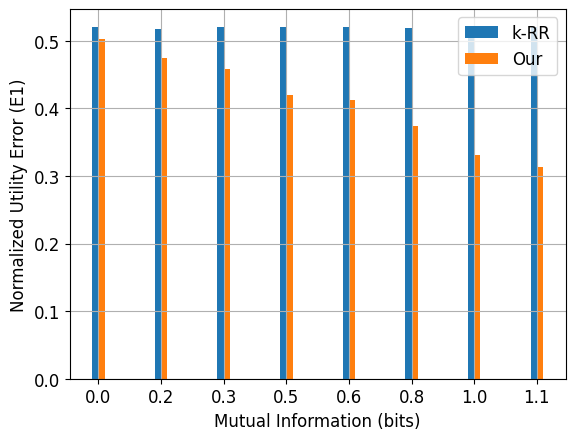

In [6]:
'''
    Test information leakage of attributes against different corrlations
'''

TARGET_UTILITY_ERROR = 0.2
NUM_ATTRIBUTES = 2
NUM_STATES = [3, 3]
DATASET_SIZE = 10000
EPS_ARRAY = np.arange(4)*0.16
plt.tight_layout()

priority_list = [{'1': 0.01, '0': 1}, {'1': 0.1, '0': 1}, {'1': 0.5, '0': 1}, {'1': 1, '0': 1}, {'1': 1, '0': 0.5}, {'1': 1, '0': 0.1}, {'1': 1, '0': 0.01}]
# priority_list = [{'1': 100, '0': 1}, {'1': 50, '0': 1}, {'1': 20, '0': 1}, {'1': 1, '0': 1}] 
# distribution_list = [0.3, 0.01, 0.01, 0.01, 0.30, 0.01, 0.01, 0.01, 0.34]

synthetic_dist = Gen_Synthetic_Distribution(original_dist=np.ones(9)/9, no_samples=20, sample_count_per_sample=100, div_type = "MI", attribute_state_count=NUM_STATES)
synthetic_dist.create_distribution()
synthetic_distribution_dict = synthetic_dist.get_synthetic_distribution()
distribution_list = list(synthetic_distribution_dict.values())

colour_err_ = {"k-RR": "red", "Optimal k-RR": "blue"}
colour_mi_ = {"k-RR": ["lightsalmon", "brown"], "Optimal k-RR": ["green", "purple"]}

values_k_rr = []
values_optimal = []

random_response_mechanism = ""
optimal_random_response_mechanism = ""

mechanisms_dict = {"k-RR": random_response_mechanism, "Our": optimal_random_response_mechanism}
x_sticks_list = []
for random_dist_index, random_dist_list in enumerate(distribution_list):
    if len(random_dist_list) == 0:
        continue
    error_dict = {}
    mi_dict = {}

    for key in ["k-RR", "Our"]: # list(mechanisms_dict.keys()):
        error_dict[key] = []
        mi_dict[key] = []
    for random_dist in random_dist_list[:min(10,len(random_dist_list))]:
        priority_dict =  {'1': 1, '0': 1}
        TOTAL_STATES = 1
        alphabet_dict = {}
        for i in range(NUM_ATTRIBUTES):
            TOTAL_STATES *= NUM_STATES[i]
            alphabet_dict[str(i)] = np.arange(NUM_STATES[i])

        ALL_ALPHABET = create_alphabet(attributes_with_alphabet=alphabet_dict)
        STRING_ALL_ALPHABET = convert_alphabet_to_string(ALL_ALPHABET)
        ATTRIBUTE_LIST = list(alphabet_dict.keys())

        synthetic_dataset_constructor = Gen_Synthetic_Dataset(no_of_states = TOTAL_STATES, no_of_samples = DATASET_SIZE, alphabet=STRING_ALL_ALPHABET)
        correlated_synthetic_dataset = synthetic_dataset_constructor.gen_custom(distribution=random_dist)

        alphabet_dict = {}
        for i in range(len(ALL_ALPHABET)):
            alphabet_dict[str(ALL_ALPHABET[i])] = i
        normalize_error_matrix = Normalize_error_matrix(attribute_list=ATTRIBUTE_LIST, alphabet=ALL_ALPHABET, priority_dict=priority_dict, alphabet_dict=alphabet_dict)
        err_matrix = normalize_error_matrix.normalized_error_matrix
        # sns.heatmap(err_matrix)
        # plt.show()
        random_response_mechanism = Randomized_Response(STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix)
        # random_response_mechanism = Exponential_mechanism(prior_dist=random_dist, STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix, only_err_matrix=True)
        optimal_random_response_mechanism = Optimized_Randomized_Response(prior_dist = random_dist, STATE_COUNT = TOTAL_STATES, INPUT_ALPHABET = STRING_ALL_ALPHABET, normalized_objective_err_matrix = err_matrix, 
                            TOLERANCE_MARGIN = 0.01, APPROXIMATION = "LINEAR", solver = "SCS", is_kl_div = True, ALPHA=0.01, accelerate_from_rr=True)

        mechanisms_dict = {"k-RR": random_response_mechanism, "Our": optimal_random_response_mechanism}

        

        for mechanism in list(mechanisms_dict.keys()):
            for eps in [2]: # EPS_ARRAY:
            
                __tot_error = 0
                __perturbed_value_list = []
                for entry in correlated_synthetic_dataset:
                    __perturbed_value_list.append(mechanisms_dict[mechanism].gen_random_output(actual_value=entry, eps=eps)[0])

                    __error = normalize_error_matrix.get_value_error(actual=entry, perturbed=__perturbed_value_list[-1])
                    __tot_error += __error
                
                error_dict[mechanism].append(__tot_error/len(correlated_synthetic_dataset))
    for mechanism in list(mechanisms_dict.keys()):
        print("mechanism ",error_dict[mechanism])
        error_dict[mechanism] = sum(error_dict[mechanism])/len(error_dict[mechanism])
    values_k_rr.append(error_dict["k-RR"])
    values_optimal.append(error_dict["Our"])
    x_sticks_list.append(list(synthetic_distribution_dict.keys())[random_dist_index])
# values_k_rr = np.array(values_k_rr)
# values_optimal = np.array(values_optimal)

x = np.arange(len(values_k_rr))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_k_rr, width, label='k-RR')
rects2 = ax.bar(x + width/2, values_optimal, width, label='Our')
plt.legend()
plt.xlabel("Mutual Information (bits)")
plt.xticks(ticks=x, labels=x_sticks_list)
plt.ylabel("Normalized Utility Error (E1)")
plt.grid(visible=True)
plt.show()
fig.savefig(f"krr_our_distribution.pdf", bbox_inches='tight')



In [7]:
synthetic_distribution_dict.keys()


dict_keys([0.0, 0.2, 0.3, 0.5, 0.6, 0.8, 1.0, 1.1, 1.3, 1.4, 1.6, 1.7, 1.9, 2.1, 2.2, 2.4, 2.5, 2.7, 2.9, 3.0, 3.2])

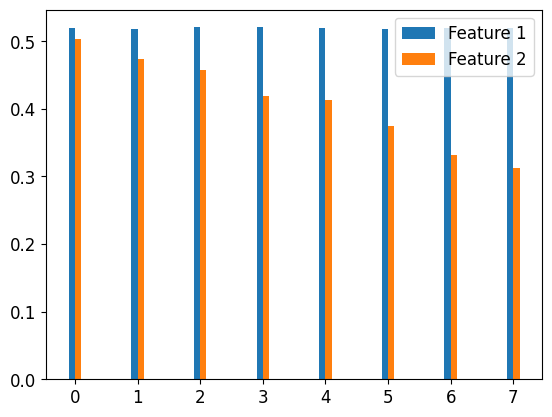

In [8]:
x = np.arange(len(values_k_rr))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_k_rr, width, label='Feature 1')
rects2 = ax.bar(x + width/2, values_optimal, width, label='Feature 2')
plt.legend()
plt.show()